In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [24]:
k = 2
cent_change = 0.0001
max_iter = 300
 

In [25]:
colors = 3*['g', 'r', 'c', 'b', 'k', 'y']

In [41]:
def fit(data, k, max_iter, tol):
    centroids = {}
    for i in range(k):
        centroids[i] = data[i]
        
    for i in range(max_iter):
        classifications = {}
        
        for i in range(k):
            classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classifications[classification].append(featureset)

        prev_centroids = dict(centroids)

        for classification in classifications:
            centroids[classification] = np.average(classifications[classification], axis = 0)

        optimized = True

        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
            if np.sum((current_centroid - original_centroid) / original_centroid*100.0) > tol:
                optimized = False

            if optimized:
                break

        return centroids, classifications

In [72]:
def predict(data, centroids):
    distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification

In [73]:
X = np.array([[1,2],
            [1.5, 1.8],
            [5, 8],
            [1, 0.6],
            [9, 11]])

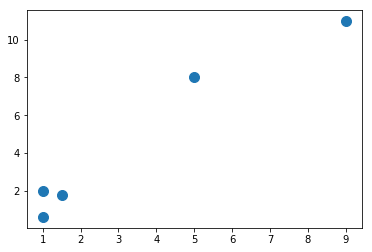

In [74]:
plt.scatter(X[:,0], X[:,1], s = 100)

In [75]:
centroids, classifications = fit(X, k, max_iter, cent_change)

In [76]:
centroids

{0: array([1., 2.]), 1: array([4.125, 5.35 ])}

In [77]:
classifications

{0: [array([1., 2.])],
 1: [array([1.5, 1.8]), array([5., 8.]), array([1. , 0.6]), array([ 9., 11.])]}

0
1


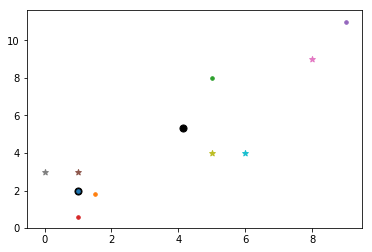

In [78]:
for class_1 in centroids:
    plt.scatter(centroids[class_1][0], centroids[class_1][1], marker = 'o', color='k', s=50)
    
for class_2 in classifications:
    print(class_2)
    
    for featureset in classifications[class_2]:
        plt.scatter(featureset[0], featureset[1], marker = '.', s = 50)
        
x_test = np.array([[1,3],
                 [8,9],
                 [0,3],
                 [5,4],
                 [6,4]])

for test in x_test:
    classification = predict(test, centroids)
    plt.scatter(test[0], test[1], marker = '*')

In [79]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [80]:
wine = load_wine()

In [81]:
x = pd.DataFrame(wine.data, columns = wine.feature_names)

In [82]:
x = (x-x.min())/(x.max()-x.min())

In [83]:
xtrain, xtest = train_test_split(x, test_size = 0.3)

In [84]:
f1 = 'hue'
f2 = 'proline'

basex = np.array(xtrain[[f1, f2]])

xtest = np.array(xtest[[f1, f2]])

In [85]:
centroids, classifications = fit(basex, k, max_iter, cent_change)

In [86]:
centroids

{0: array([0.47642276, 0.54389138]), 1: array([0.33967001, 0.16248846])}

In [87]:
classifications

{0: [array([0.43089431, 0.54707561]),
  array([0.45528455, 0.56134094]),
  array([0.34634146, 0.42225392]),
  array([0.52845528, 0.78245364]),
  array([0.62601626, 0.87874465]),
  array([0.45528455, 0.45791726]),
  array([0.44715447, 0.64693295]),
  array([0.38211382, 0.36875892]),
  array([0.09756098, 0.39372325]),
  array([0.62601626, 0.68259629]),
  array([0.45528455, 0.53994294]),
  array([0.49593496, 0.5256776 ]),
  array([0.57723577, 0.71825963]),
  array([0.4796748 , 0.70756063]),
  array([0.48780488, 0.54707561]),
  array([0.6097561 , 0.50784593]),
  array([0.3495935, 0.5042796]),
  array([0.43902439, 0.33666191]),
  array([0.6097561, 1.       ]),
  array([0.54471545, 0.74322397]),
  array([0.45528455, 0.56134094]),
  array([0.58536585, 0.90513552]),
  array([0.62601626, 0.28673324]),
  array([0.6504065 , 0.31383738]),
  array([0.44715447, 0.35092725]),
  array([0.64227642, 0.30813124]),
  array([0.47154472, 0.7253923 ]),
  array([0.56097561, 0.7146933 ]),
  array([0.49593496, 

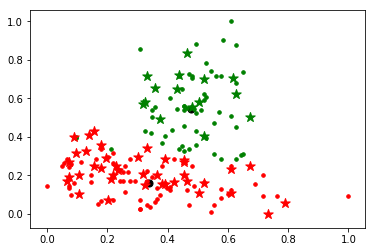

In [88]:
for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker = 'o', color = 'k', s = 50)
    
for classification in classifications:
    color = colors[classification]
    
    for next_datapoint in classifications[classification]:
        plt.scatter(next_datapoint[0], next_datapoint[1], marker = '.', color = color, s = 50)
        
for test in xtest:
    classification = predict(test, centroids)
    plt.scatter(test[0], test[1], marker = '*', color = colors[classification], s = 100)